In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('climate_action_data.csv')
df.head()


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,01-01-25,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,02-01-25,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,03-01-25,61.24,6.52,21.9,54.6,Tomatoes,36,29.4,IMG-2002
3,SEN-1003,04-01-25,51.91,6.62,24,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,05-01-25,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [81]:
df.dtypes

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [82]:
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1779,02-01-26,error,7.54,19.1,56,Wheat,66.9,8,IMG-2779
freq,2,2,5,11,13,8,203,8,11,2


In [83]:
#Empty cells
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [84]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing 'Date'
initial_rows_date_nan = df.shape[0]
df.dropna(subset=['Date'], inplace=True)
rows_after_date_nan_drop = df.shape[0]
print(f"\nNumber of rows dropped due to missing 'Date': {initial_rows_date_nan - rows_after_date_nan_drop}")





Number of rows dropped due to missing 'Date': 4


C:\Users\HP\AppData\Local\Temp\ipykernel_14228\754285485.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [85]:
#Empty cells
df.isnull().sum()

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [86]:
# Fill missing Crop type values with mode
df['Crop_Type'] = df['Crop_Type'].fillna(df['Crop_Type'].mode()[0])

df.isnull().sum()


Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [87]:
# Handle Soil moisture with error values
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')

# Handle Soil_pH with error values
df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors='coerce')

# Handle Temperature with error values
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')

# Handle Humidity with error values
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors='coerce')

# Handle Fertilizer_Recommended with error values
df['Fertilizer_Recommended(kg/ha)'] = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors='coerce')

# Handle Irrigation_Recommended with error values
df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce')

df.dtypes

Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object

In [88]:
# Handle columns with NaN values
# For Numeric columns
numeric_columns = [
    'Soil_Moisture(%)', 
    'Soil_pH', 
    'Temperature(C)', 
    'Humidity(%)', 
    'Fertilizer_Recommended(kg/ha)', 
    'Irrigation_Recommended(mm)'
]
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric, coercing errors to NaN
        # fill NaN values with the mean of the column
        df[col] = df[col].fillna(df[col].median())

# For Categorical columns
categorical_columns = ['Crop_Type', 'Drone_Image_ID']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])


In [89]:
# Wrong Data
numeric_cols = [
    'Soil_Moisture(%)', 
    'Soil_pH', 
    'Temperature(C)', 
    'Humidity(%)', 
    'Fertilizer_Recommended(kg/ha)', 
    'Irrigation_Recommended(mm)'
]
for col in numeric_cols:
    if col in df.columns:
       # Remove exteme outliers beyond 3 standard deviations
       mean = df[col].mean()
       std = df[col].std()
       df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
       df[col] = df[col].fillna(df[col].median())

In [90]:
# Duplicates
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 111


In [91]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
# Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

# Shape
df.shape

Number of rows after removing duplicates: 798
Number of duplicate dates: 0


(798, 10)


--- Exploratory Data Analysis ---

Descriptive Statistics for Numerical Variables:
                                Date  Soil_Moisture(%)     Soil_pH  \
count                            798        798.000000  798.000000   
mean   2026-02-10 00:23:27.518797056         44.827237    6.252519   
min              2025-01-01 00:00:00         10.350000    4.520000   
25%              2025-07-19 06:00:00         26.970000    5.330000   
50%              2026-02-04 00:00:00         45.230000    6.295000   
75%              2026-08-23 18:00:00         62.642500    7.080000   
max              2027-12-02 00:00:00         79.980000    8.000000   
std                              NaN         20.447709    1.021805   

       Temperature(C)  Humidity(%)  Fertilizer_Recommended(kg/ha)  \
count      798.000000   798.000000                     798.000000   
mean        26.477694    60.118734                      87.420927   
min         18.000000    30.000000                      30.000000   
25%      

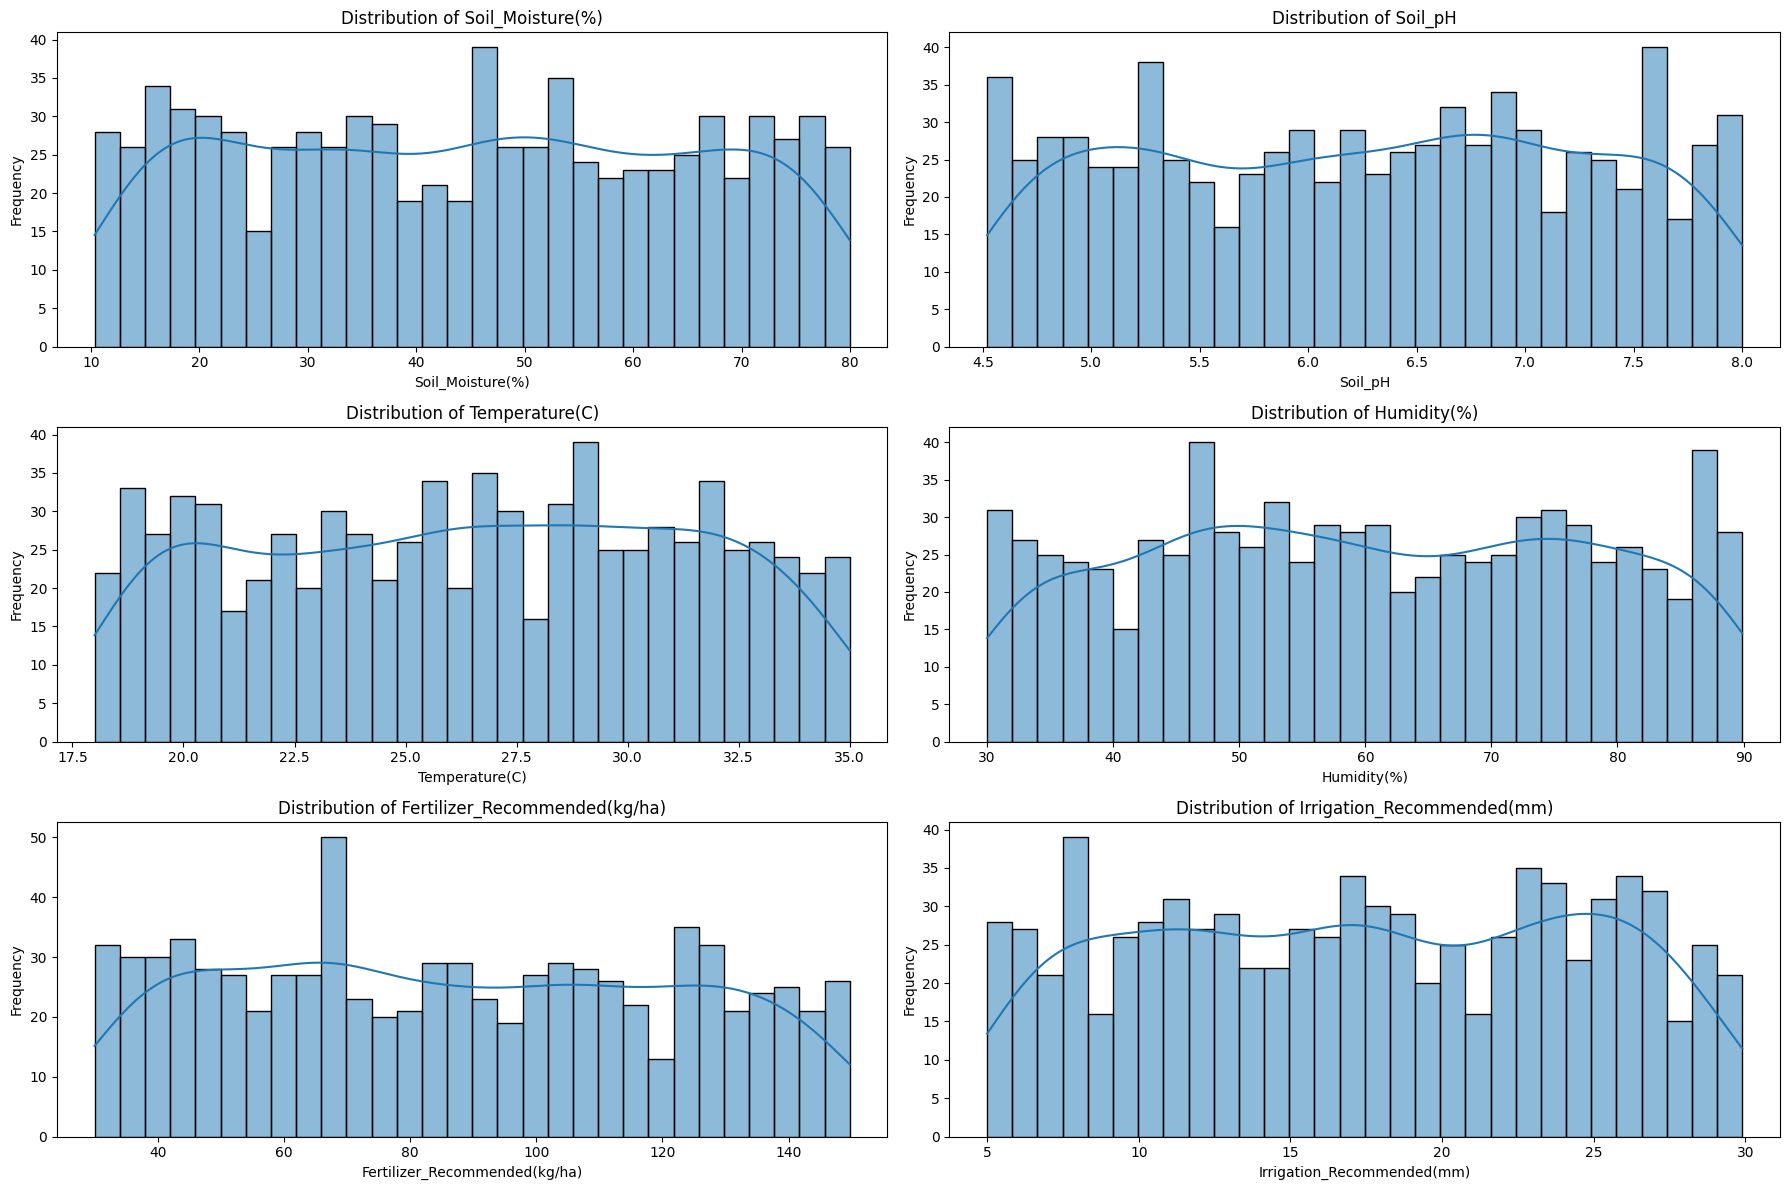

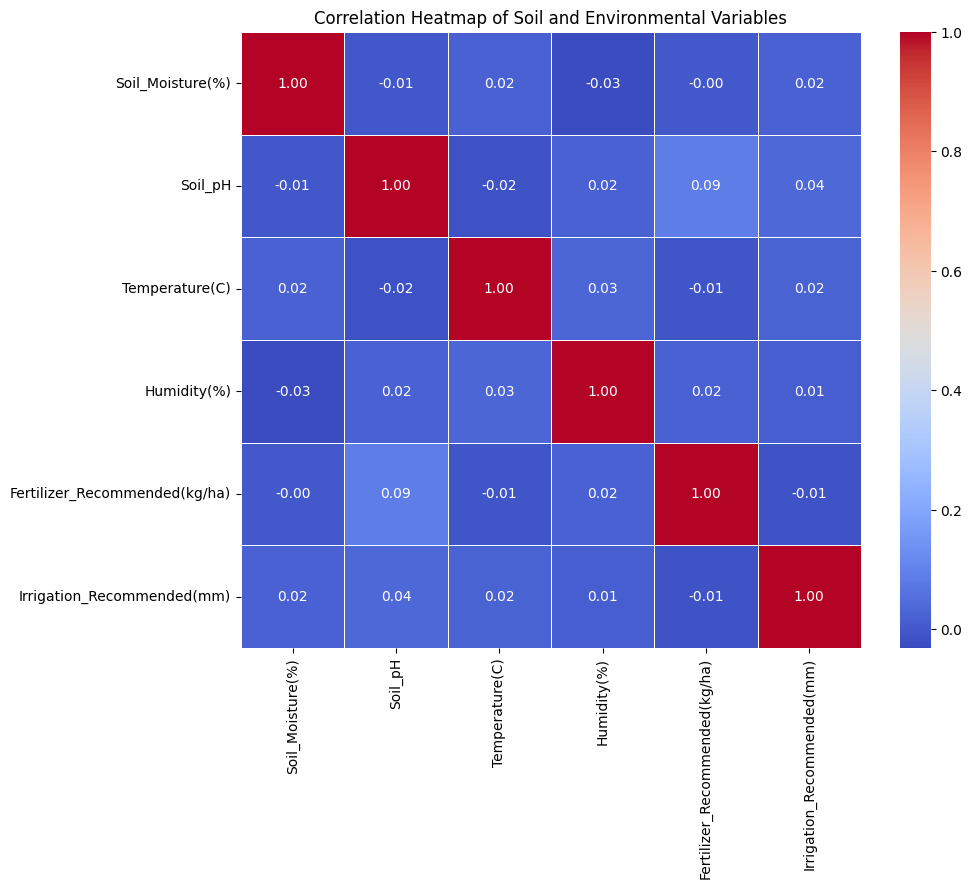

In [92]:
# 3. Exploratory Data Analysis (EDA)

print("\n--- Exploratory Data Analysis ---")

# Descriptive Statistics
print("\nDescriptive Statistics for Numerical Variables:")
print(df.describe())

# Visualize Distributions of Numeric Variables using Histograms
numerical_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Correlation Heatmap
# Select relevant numerical columns for correlation
correlation_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Soil and Environmental Variables')
plt.show()

In [93]:
# 4. Derive Insights and Recommendations

print("\n--- Insights and Recommendations ---")

# Identify variables most influencing fertilizer recommendations
# Assuming 'Fertilizer_Recommended' is the proxy for fertilizer recommendations.
# We look at correlations with Fertilizer_Recommended.
fertilizer_corr = corr_matrix['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("\nCorrelation of Variables with Fertilizer_Recommended:")
print(fertilizer_corr)

# Insights:
print("\nInsights on Fertilizer Recommendations:")
if fertilizer_corr.index[0] == 'Fertilizer_Recommended(kg/ha)': # Skip self-correlation
    top_influencer_1 = fertilizer_corr.index[1]
    top_corr_1 = fertilizer_corr.iloc[1]
    top_influencer_2 = fertilizer_corr.index[2]
    top_corr_2 = fertilizer_corr.iloc[2]
else:
    top_influencer_1 = fertilizer_corr.index[0]
    top_corr_1 = fertilizer_corr.iloc[0]
    top_influencer_2 = fertilizer_corr.index[1]
    top_corr_2 = fertilizer_corr.iloc[1]

print(f"- '{top_influencer_1}' has the strongest positive correlation with Fertilizer_Recommended ({top_corr_1:.2f}).")
print(f"- '{top_influencer_2}' also shows a notable correlation ({top_corr_2:.2f}).")
print("This suggests that these variables might be key drivers for current fertilizer application rates.")

# Determine the crop type with the highest average soil moisture
avg_soil_moisture_by_croptype = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
highest_moisture_crop = avg_soil_moisture_by_croptype.index[0]
highest_moisture_value = avg_soil_moisture_by_croptype.iloc[0]
print(f"\nCrop type with the highest average Soil Moisture: '{highest_moisture_crop}' ({highest_moisture_value:.2f}%)")

# Suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C
crops_avg_temp = df.groupby('Crop_Type')['Temperature(C)'].mean()
hot_crops = crops_avg_temp[crops_avg_temp > 30]

print("\nCrops experiencing average temperatures above 30°C and Irrigation Adjustments:")
if not hot_crops.empty:
    for crop, avg_temp in hot_crops.items():
        print(f"- {crop}: Average Temperature = {avg_temp:.2f}°C")
        # Now, let's get the average soil moisture for these hot crops to inform irrigation
        current_avg_moisture = df[df['Crop_Type'] == crop]['Soil_Moisture(%)'].mean()
        print(f"  Current Average Soil Moisture: {current_avg_moisture:.2f}%")
        print("  **Recommendation:** Increase irrigation frequency and/or volume for this crop type.")
        print("  Monitor soil moisture levels closely, aiming to maintain optimal moisture range (e.g., 60-80% for many crops) to counteract increased evapotranspiration due to high temperatures.")
        print("  Consider scheduled irrigation during cooler parts of the day (early morning/late evening) to minimize water loss from evaporation.")
else:
    print("No crop types are experiencing average temperatures above 30°C in this dataset.")

# Additional recommendations based on general observations
print("\nGeneral Recommendations for Precision Agriculture:")
print("- **Continuous Monitoring:** Implement real-time sensor data collection for continuous monitoring of soil and environmental conditions.")
print("- **Dynamic Fertilization:** Utilize the identified influencing variables to develop dynamic fertilizer recommendation models, adjusting dosages based on current conditions rather than fixed schedules.")
print("- **Smart Irrigation Systems:** Deploy automated irrigation systems that respond to real-time soil moisture and temperature data to optimize water usage and prevent under/over-watering.")
print("- **Crop-Specific Thresholds:** Establish crop-specific optimal ranges for soil moisture, pH, temperature, and humidity for more precise management.")
print("- **Yield Optimization:** Further analyze factors influencing 'Yield' to develop predictive models for crop yield based on environmental and fertilizer inputs.")


--- Insights and Recommendations ---

Correlation of Variables with Fertilizer_Recommended:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.085569
Humidity(%)                      0.017061
Soil_Moisture(%)                -0.001722
Temperature(C)                  -0.008140
Irrigation_Recommended(mm)      -0.012448
Name: Fertilizer_Recommended(kg/ha), dtype: float64

Insights on Fertilizer Recommendations:
- 'Soil_pH' has the strongest positive correlation with Fertilizer_Recommended (0.09).
- 'Humidity(%)' also shows a notable correlation (0.02).
This suggests that these variables might be key drivers for current fertilizer application rates.

Crop type with the highest average Soil Moisture: 'Wheat' (47.36%)

Crops experiencing average temperatures above 30°C and Irrigation Adjustments:
No crop types are experiencing average temperatures above 30°C in this dataset.

General Recommendations for Precision Agriculture:
- **Continuous Monitoring:** Implement r

In [94]:
# Final clean dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      798 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               798 non-null    float64       
 3   Soil_pH                        798 non-null    float64       
 4   Temperature(C)                 798 non-null    float64       
 5   Humidity(%)                    798 non-null    float64       
 6   Crop_Type                      798 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  798 non-null    float64       
 8   Irrigation_Recommended(mm)     798 non-null    float64       
 9   Drone_Image_ID                 798 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.6+ KB
Missing values after all

In [95]:
# Output cleaned dataset 
df.to_csv('cleaned_precision_agriculture_data.csv ', index=False)